<a href="https://colab.research.google.com/github/Devraj02-sys/AI-ML-project/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM Accuracy: 0.75
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00         1
         sad       1.00      1.00      1.00         3
       angry       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.75      0.75      0.75         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

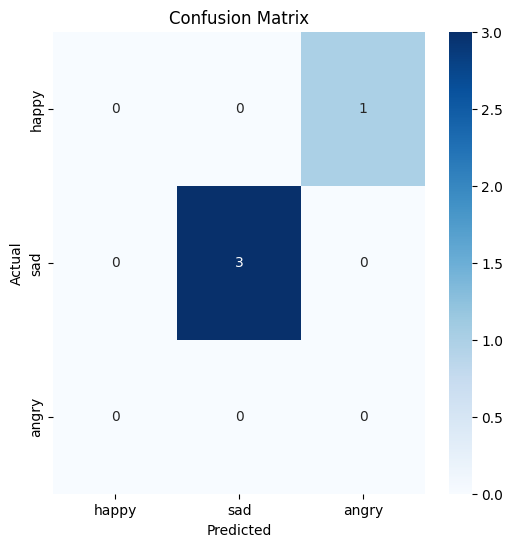

In [15]:
import numpy as np
import seaborn as sns
import neattext as nt
import neattext.functions as ntfx
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extended Dataset
data = [
    ("I am so happy today!", "happy"),
    ("I feel very sad and lonely.", "sad"),
    ("Why are you so angry with me?", "angry"),
    ("This is the best day of my life!", "happy"),
    ("I am extremely frustrated right now.", "angry"),
    ("Tears won't stop falling from my eyes.", "sad"),
    ("I just want to dance with joy!", "happy"),
    ("He makes me so mad!", "angry"),
    ("I feel heartbroken and lost.", "sad"),
    ("What a wonderful surprise!", "happy"),
    ("I'm feeling miserable and depressed.", "sad"),
    ("I am boiling with rage!", "angry"),
    ("Laughing all day, best time ever!", "happy"),
    ("I feel so alone and broken.", "sad"),
    ("This situation makes me furious!", "angry"),
    ("Excited for the trip tomorrow!", "happy"),
    ("I can't stop crying, I feel terrible.", "sad"),
    ("You just ruined everything, I'm so mad!", "angry"),
]

# Preprocessing
texts, labels = zip(*data)
processed_texts = [ntfx.remove_stopwords(ntfx.remove_special_characters(text.lower())) for text in texts]

# Convert labels to numerical format
label_map = {"happy": 0, "sad": 1, "angry": 2}
numeric_labels = [label_map[label] for label in labels]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(processed_texts, numeric_labels, test_size=0.2, random_state=42)

# SVM Model
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_vec, y_train)

# Save SVM Model
joblib.dump((vectorizer, svm), "svm_emotion_detector.pkl")

# Evaluate SVM Model
y_pred_svm = svm.predict(X_test_vec)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=label_map.keys()))

conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

